In [ ]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества


# Лабораторная работа №4

## Выполнил Попов Матвей, М8О-408Б-20


В качестве задачи выберем регрессию, а конкретно предсказание цены 
недвижимости.

Датасет доступен по [ссылке](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/download?datasetVersionNumber=1)

Чтобы обучить модели локально, скачайте архив, поместите csv файл из него в 
директорию `dataset` и переименуйте его в `dataset.csv`.


Считаем датасет из csv файла

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('dataset/dataset.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

Удалим записи, в которых присутствуют пустые значения

In [4]:
data = data.dropna()
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Преобразуем категориальные признаки в числовые

In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

furnishing_status_ohe = pd.get_dummies(data['furnishingstatus'], prefix='furnishing')
data = pd.concat([data, furnishing_status_ohe], axis=1)
data.drop('furnishingstatus', axis=1, inplace=True)


In [ ]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

Посмотрим на распределение цены домов

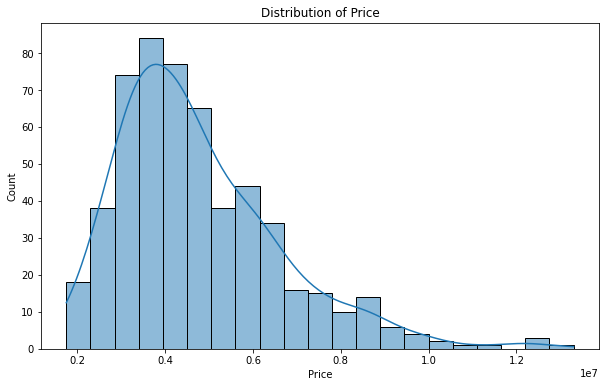

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data["price"], kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Price")
plt.show()


In [ ]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

В качестве метрики качества будем использовать MSE.

In [ ]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

Разделим датасет на обучающую и тестовую выборки

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)  
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2904)


Создадим и обучим модель

In [18]:
import tensorflow as tf

keras_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

keras_model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

keras_history = keras_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
16/16 [==============================] - 1s 4ms/step - loss: 25810767446016.0000 - accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 25790118887424.0000 - accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 25767928922112.0000 - accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 25737828499456.0000 - accuracy: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 25695361171456.0000 - accuracy: 0.0000e+00
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 25637649645568.0000 - accuracy: 0.0000e+00
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 25558813507584.0000 - accuracy: 0.0000e+00
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 25455562326016.0000 - accuracy: 0.0000e+00
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss:

In [ ]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [ ]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [20]:
from sklearn.metrics import mean_squared_error

y_train_pred = keras_model.predict(X_train)

print('Результаты модели:')
print('MSE на тренировочных данных:', mean_squared_error(y_train, y_train_pred))


16/16 [==============================] - 0s 2ms/step
Результаты модели:
MSE на тренировочных данных: 3252734052573.746


In [ ]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

Визуализируем процесс обучения

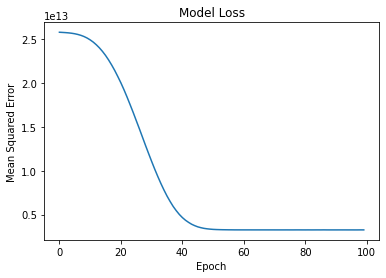

In [21]:
plt.plot(keras_history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

Обучим модель

In [28]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression()
_ = sklearn_model.fit(X_train, y_train)


In [29]:
y_train_pred = sklearn_model.predict(X_train)

print('Результаты модели')
print('MSE на тренировочных данных:', mean_squared_error(y_train, y_train_pred))


Результаты модели
MSE на тренировочных данных: 1059733732173.634


### Вывод

Модель, обученная средствами sklearn оказалась примерно в 3 раза точнее.


In [ ]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью